Let's install the required packages and load the dataset 

In [51]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df_match= pd.read_csv("matches.csv")
df_match.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [52]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [16]:
df_match.shape

(1095, 20)

checing duplicate rows

In [53]:
df_match.duplicated().sum()

np.int64(0)

In [32]:
df_del= pd.read_csv("deliveries.csv")

In [54]:
df_del.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [55]:
df_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [56]:
df_del.duplicated().sum() #checking duplicated rows

np.int64(0)

In [57]:
df_match.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

Data Preprocessing

In [58]:
df_match[df_match['city'].isna()]['venue']


399                Sharjah Cricket Stadium
402    Dubai International Cricket Stadium
403    Dubai International Cricket Stadium
404                Sharjah Cricket Stadium
406                Sharjah Cricket Stadium
407    Dubai International Cricket Stadium
408                Sharjah Cricket Stadium
409    Dubai International Cricket Stadium
410    Dubai International Cricket Stadium
413                Sharjah Cricket Stadium
414                Sharjah Cricket Stadium
415    Dubai International Cricket Stadium
417    Dubai International Cricket Stadium
757    Dubai International Cricket Stadium
758    Dubai International Cricket Stadium
759                Sharjah Cricket Stadium
761    Dubai International Cricket Stadium
762    Dubai International Cricket Stadium
764                Sharjah Cricket Stadium
765    Dubai International Cricket Stadium
767    Dubai International Cricket Stadium
769    Dubai International Cricket Stadium
771                Sharjah Cricket Stadium
772    Duba

here we can replace city names by the venue, so we can get all those 51 citi names with the help of venue, and we will replace accordingly

In [59]:
df_match.loc[(df_match['city'].isna()) & (df_match['venue'] == 'Sharjah Cricket Stadium'), 'city'] = 'Sharjah'
df_match.loc[(df_match['city'].isna()) & (df_match['venue'] == 'Dubai International Cricket Stadium'), 'city'] = 'Dubai'
print(df_match['city'].isnull().sum())

np.int64(0)

In [62]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [63]:
df_match = df_match.drop(columns=['method'])  # droping the method column

replacing season year to proper format

In [65]:
df_match.replace({'season': {"2020/21": "2020", "2009/10": "2010", "2007/08": "2008"}}, inplace=True)

As the name of franchise has beenn changed over the years, we need to the update the franchise(ipl teams) names to recent names.

In [66]:
team_map ={"Mumbai Indians":"Mumbai Indians",
          "Chennai Super Kings":"Chennai Super Kings",
          "Kolkata Knight Riders":"Kolkata Knight Riders",
          "Royal Challengers Bangalore":"Royal Challengers Bangalore",
          "Royal Challengers Bengaluru":"Royal Challengers Bangalore",
          "Rajasthan Royals":"Rajasthan Royals",
          "Kings XI Punjab":"Kings XI Punjab",
          "Punjab Kings":"Kings XI Punjab",
          "Sunrisers Hyderabad":"Sunrisers Hyderabad",
          "Deccan Chargers":"Sunrisers Hyderabad",
          "Delhi Capitals":"Delhi Capitals",
          "Delhi Daredevils":"Delhi Capitals",
          "Gujarat Titans":"Gujarat Titans",
          "Gujarat Lions":"Gujarat Titans",
          "Lucknow Super Giants":"Lucknow Super Giants",
          "Pune Warriors":"Pune Warriors",
          "Rising Pune Supergiant":"Pune Warriors",
          "Rising Pune Supergiants":"Pune Warriors",
          "Kochi Tuskers Kerala":"Kochi Tuskers Kerala"}

#For Match table 
df_match['team1']= df_match['team1'].map(team_map)
df_match['team2']= df_match['team2'].map(team_map)
df_match['winner']= df_match['winner'].map(team_map)
df_match['toss_winner']= df_match['toss_winner'].map(team_map)

#For Deliverise Tables 
df_del['batting_team']= df_del['batting_team'].map(team_map)
df_del['bowling_team']= df_del['bowling_team'].map(team_map)

Number of matches for each season

In [78]:
df_match['season'].value_counts().to_frame().T

season,2013,2023,2012,2022,2011,2024,2018,2021,2020,2019,2016,2014,2010,2017,2015,2008,2009
count,76,74,74,74,73,71,60,60,60,60,60,60,60,59,59,58,57


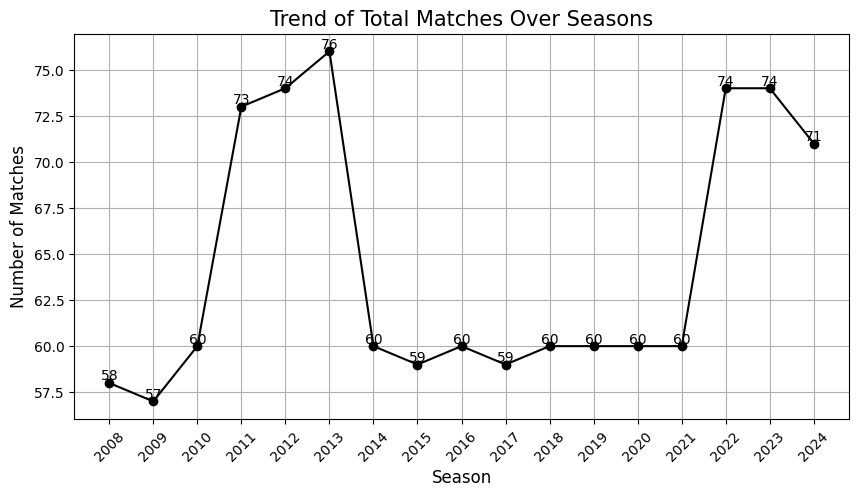

In [ ]:
import matplotlib.pyplot as plt

season_counts = df_match['season'].value_counts().sort_index()

# Ploting the trend as a line chart
plt.figure(figsize=(10, 5))  
plt.plot(season_counts.index, season_counts.values, marker='o', linestyle='-', color='black')

# Adding titles and labels
plt.title('Trend of Total Matches Over Seasons', fontsize=15)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)

# Annotating each data point with the value
for i, value in enumerate(season_counts.values):
    plt.text(season_counts.index[i], value, str(value), fontsize=10, ha='center', va='bottom')
plt.xticks(rotation=45)  
plt.grid(True)           
plt.show()

Top five cities which hosted higest number of ipl matches

In [96]:
df_match['city'].value_counts().head(5)

city
Mumbai       173
Kolkata       93
Delhi         90
Chennai       85
Hyderabad     77
Name: count, dtype: int64

Breakdown of number of matches played at each city.

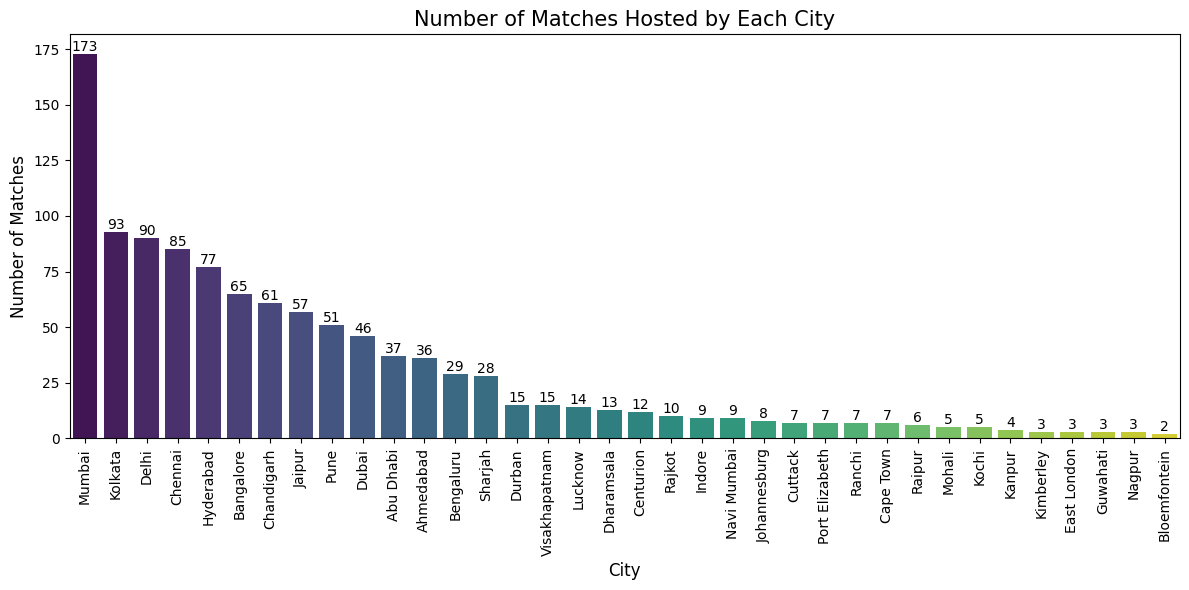

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# count the occurrences
city_counts = df_match['city'].value_counts()

# Creating a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')

# Add titles and labels
plt.title('Number of Matches Hosted by Each City', fontsize=15)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
for i, value in enumerate(city_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show() 

In [115]:
print(df_match['target_runs'].mean()) #average target score in an IPL over all seasoms

165.68406593406593


Distribution of target runs scored by the teams batting first in all seasons

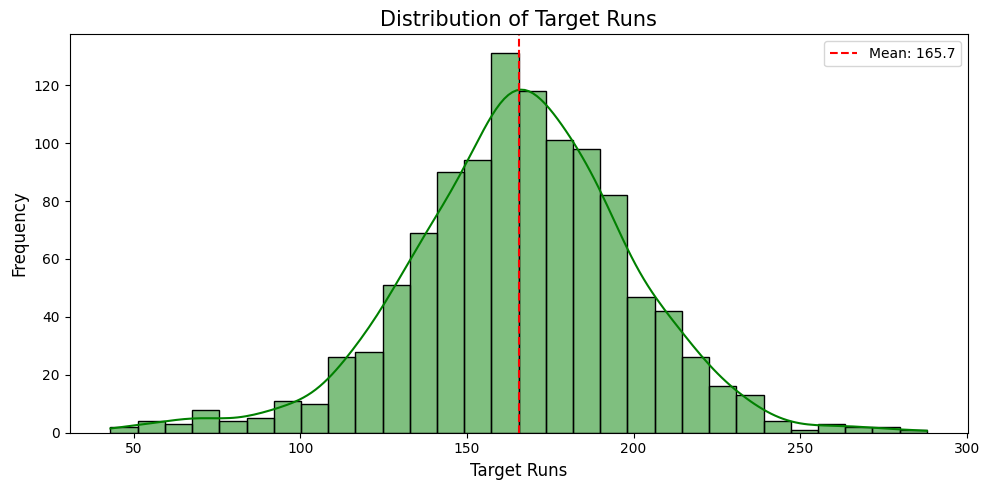

In [112]:
# Calculating the mean of 'target_runs'
mean_target_runs = df_match['target_runs'].mean()

# Creating histogram plot to show the distribution 
plt.figure(figsize=(10, 5))  # Set the figure size
sns.histplot(df_match['target_runs'].dropna(), bins=30, kde=True, color='green') 

# Adding a vertical line for the mean
plt.axvline(mean_target_runs, color='red', linestyle='--', label=f'Mean: {mean_target_runs:.1f}')

# Adding titles and labels
plt.title('Distribution of Target Runs', fontsize=15)
plt.xlabel('Target Runs', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()  
plt.show()

Trends of average target runs in every season

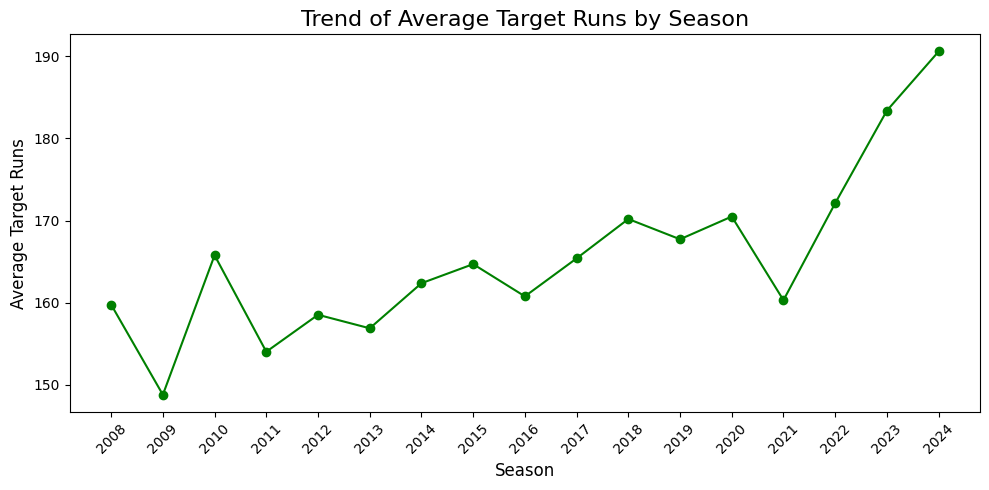

In [156]:
# avg target run by season 
avg_run_byseason = pd.pivot_table(data=df_match, index='season', values='target_runs', aggfunc='mean')
avg_run_byseason.reset_index(inplace=True)

# Creating line plot
plt.figure(figsize=(10, 5))
plt.plot(avg_run_byseason['season'], avg_run_byseason['target_runs'], marker='o', linestyle='-', color='green')

# Adding titles and labels
plt.title('Trend of Average Target Runs by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Target Runs', fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Distribution of wining the match by margin of runs

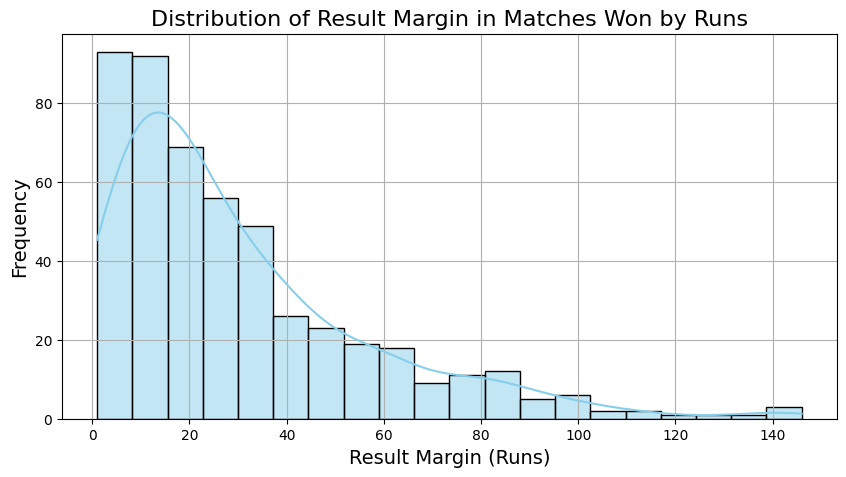

In [158]:
# distribution of results won by runs
runs_margin = df_match[df_match['result'] == 'runs']['result_margin']

# Ploting the distribution of result margins using histogram 
plt.figure(figsize=(10, 5))
sns.histplot(runs_margin, bins=20, kde=True, color='skyblue')

# Adding titles and labels
plt.title('Distribution of Result Margin in Matches Won by Runs', fontsize=16)
plt.xlabel('Result Margin (Runs)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

Match statistics 

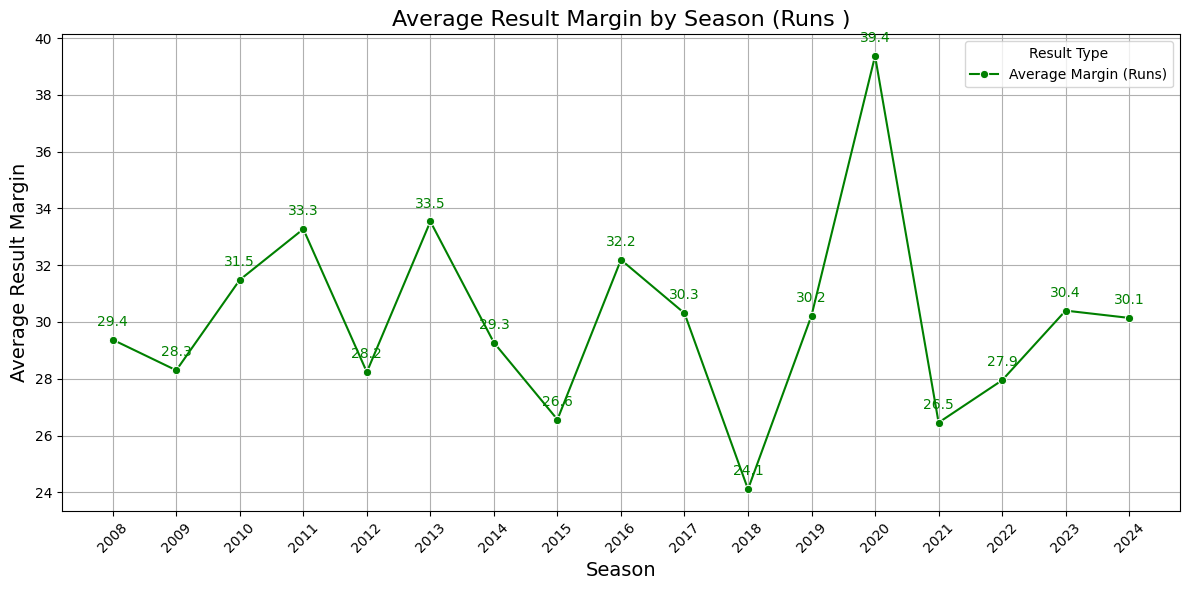

In [124]:
result_margins = df_match[(df_match['result'] == 'runs') ]

# Creating a pivot table for average result margins by season and result type
avg_result = pd.pivot_table(
    data=result_margins, 
    index='season', 
    columns='result', 
    values='result_margin', 
    aggfunc='mean'
)

# Resetting the index for plotting
avg_result.reset_index(inplace=True)

# Plotting the average result margins
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_result, x='season', y='runs', marker='o', label='Average Margin (Runs)', color='green')

# Adding titles and labels
plt.title('Average Result Margin by Season (Runs )', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Result Margin', fontsize=14)
plt.legend(title='Result Type')
# Showing the values on markers
for index, row in avg_result.iterrows():
    plt.annotate(f'{row["runs"]:.1f}', 
                 (row['season'], row['runs']), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='green')
    
plt.grid()
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


In [127]:
#total match played by team 
total_matches= (df_match['team1'].value_counts()+df_match['team2'].value_counts()).rename_axis('Team').reset_index(name="Total_Match_Played")
# Count of wins for each team
total_wins = df_match['winner'].value_counts().rename_axis('Team').reset_index(name='Total_Wins')

# Count of wins when chasing a target
team_chasing = df_match[df_match['toss_decision'] == 'field']['winner'].value_counts().rename_axis('Team').reset_index(name='Chasing_Wins')

# Count of wins when batting first
team_batting_first = df_match[df_match['toss_decision'] == 'bat']['winner'].value_counts().rename_axis('Team').reset_index(name='Batting_First_Wins')


# Merge all the DataFrames
merged_df = total_matches.merge(total_wins,on='Team',how='outer') \
    .merge(team_chasing, on='Team', how='outer') \
    .merge(team_batting_first, on='Team', how='outer') 
    

# Fill NaN values with 0
merged_df= merged_df.fillna(0)
#sorting by total match played
merged_df.sort_values(by='Total_Match_Played', ascending=False, inplace=True)

In [128]:
# Display the final merged DataFrame
merged_df.set_index('Team', drop=True).sort_values(by='Total_Wins', ascending=False)

,Total_Match_Played,Total_Wins,Chasing_Wins,Batting_First_Wins
Team,,,,
Mumbai Indians,261,144,90,54.0
Chennai Super Kings,238,138,75,63.0
Kolkata Knight Riders,251,131,81,50.0
Royal Challengers Bangalore,255,123,85,38.0
Sunrisers Hyderabad,257,117,73,44.0
Delhi Capitals,252,115,73,42.0
Kings XI Punjab,246,112,84,28.0
Rajasthan Royals,221,112,69,43.0
Gujarat Titans,75,41,30,11.0


Percentage match statistics

In [129]:
# Create a copy of the merged DataFrame to keep the original intact
percentage_df = merged_df.copy()

# Convert columns to percentage
percentage_df['Total_Wins'] = (percentage_df['Total_Wins'] / percentage_df['Total_Match_Played']) * 100
percentage_df['Chasing_Wins'] = (percentage_df['Chasing_Wins'] / merged_df['Total_Wins']) * 100
percentage_df['Batting_First_Wins'] = (percentage_df['Batting_First_Wins'] / merged_df['Total_Wins']) * 100

In [130]:
percentage_df.set_index('Team', drop=True).sort_values(by='Total_Wins', ascending=False)

,Total_Match_Played,Total_Wins,Chasing_Wins,Batting_First_Wins
Team,,,,
Chennai Super Kings,238,57.983193,54.347826,45.652174
Mumbai Indians,261,55.172414,62.500000,37.500000
Gujarat Titans,75,54.666667,73.170732,26.829268
Lucknow Super Giants,44,54.545455,75.000000,25.000000
Kolkata Knight Riders,251,52.191235,61.832061,38.167939
Rajasthan Royals,221,50.678733,61.607143,38.392857
Royal Challengers Bangalore,255,48.235294,69.105691,30.894309
Delhi Capitals,252,45.634921,63.478261,36.521739
Kings XI Punjab,246,45.528455,75.000000,25.000000


Highest scores by each team

In [132]:
import pandas as pd

#Pivoting data to get the sum of runs for each team per match
pivot_table = pd.pivot_table(
    data=df_del,
    index='match_id',
    columns='batting_team',
    values='total_runs',
    aggfunc='sum',
    fill_value=0
)

#melting the DataFrame to make it tidy
melted_df = pivot_table.reset_index().melt(id_vars='match_id', var_name='batting_team', value_name='total_runs')

#Filtering out rows where total_runs is zero (team did not play)
filtered_df = melted_df[melted_df['total_runs'] > 0]

filtered_df.reset_index(drop=True, inplace=True)

In [133]:
filtered_df

,match_id,batting_team,total_runs
0,335983,Chennai Super Kings,240
1,335989,Chennai Super Kings,208
2,335993,Chennai Super Kings,152
3,335996,Chennai Super Kings,178
4,336001,Chennai Super Kings,169
...,...,...,...
2182,1426295,Sunrisers Hyderabad,167
2183,1426307,Sunrisers Hyderabad,215
2184,1426309,Sunrisers Hyderabad,159
2185,1426311,Sunrisers Hyderabad,175


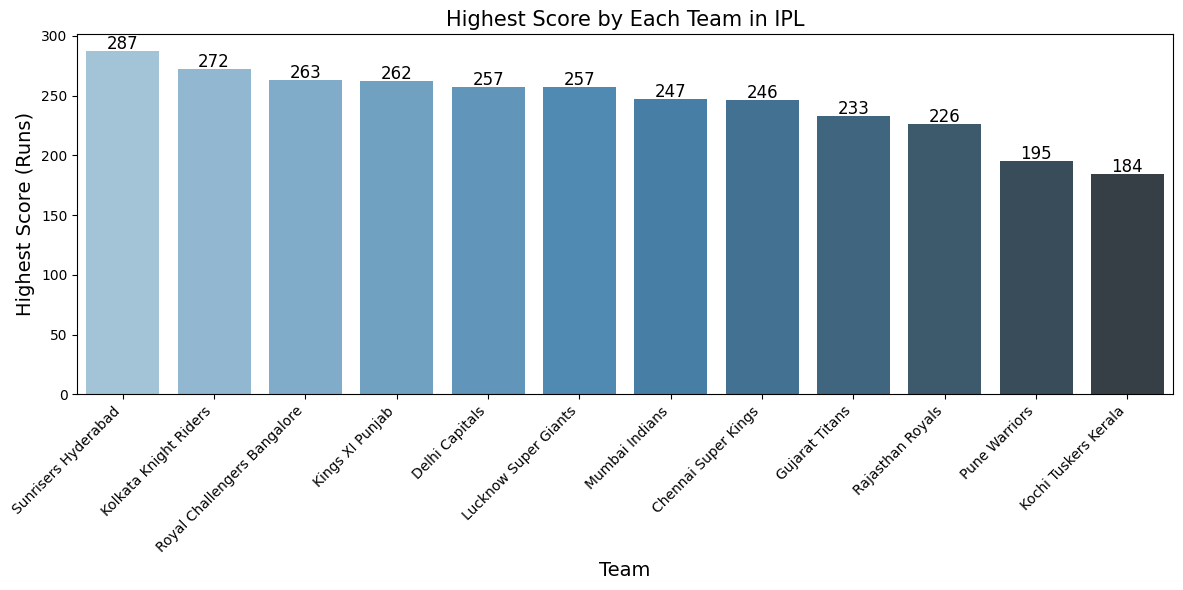

In [135]:
# Fltering highest score for each team
highest_scores = filtered_df.groupby('batting_team')['total_runs'].max().reset_index()

# Sorting by the highest score in descending order
highest_scores_sorted = highest_scores.sort_values(by='total_runs', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 6))

# Drawinga barplot
sns.barplot(x='batting_team', y='total_runs', data=highest_scores_sorted, palette='Blues_d')

# Adding the score value at the top of each bar
for index, value in enumerate(highest_scores_sorted['total_runs']):
    plt.text(index, value + 2, f'{value}', ha='center', fontsize=12)

# Adding labels and title
plt.xlabel('Team', fontsize=14)
plt.ylabel('Highest Score (Runs)', fontsize=14)
plt.title('Highest Score by Each Team in IPL', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Number of times each team scored above 200 runs

In [136]:
# Filter the data to only include rows where teams scored more than 200 runs
high_scores_df = filtered_df[filtered_df['total_runs'] > 200 | ]

# Counting the number of times each team has scored more than 200 runs
team_200_plus_count = high_scores_df.groupby('batting_team')['total_runs'].count().reset_index()

# Renaming the column for clarity
team_200_plus_count.columns = ['Team', '200+ Runs Count']

# Sorting the result in descending order of the count
team_200_plus_count_sorted = team_200_plus_count.sort_values(by='200+ Runs Count', ascending=False).reset_index(drop=True)

print(team_200_plus_count_sorted)

                          Team  200+ Runs Count
0          Chennai Super Kings               29
1  Royal Challengers Bangalore               28
2              Kings XI Punjab               24
3               Mumbai Indians               23
4        Kolkata Knight Riders               21
5          Sunrisers Hyderabad               21
6             Rajasthan Royals               20
7               Delhi Capitals               16
8               Gujarat Titans                8
9         Lucknow Super Giants                7


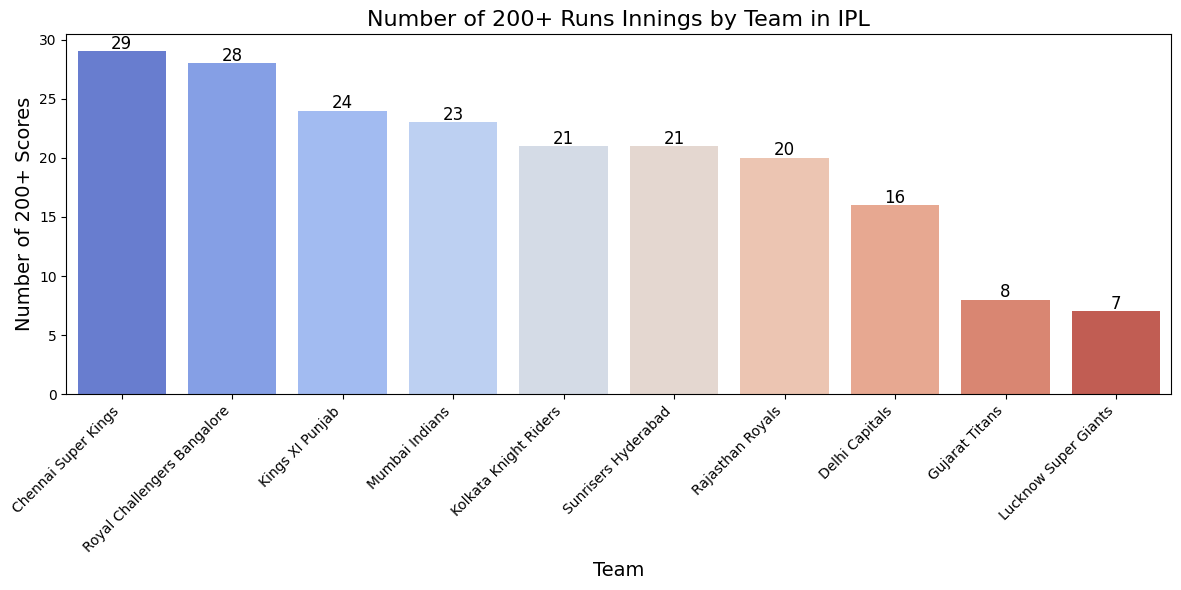

In [137]:
# Drawing bar plot to visualize
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='200+ Runs Count', data=team_200_plus_count_sorted, palette='coolwarm')

# Adding the count on top of each bar
for index, value in enumerate(team_200_plus_count_sorted['200+ Runs Count']):
    plt.text(index, value + 0.2, str(value), ha='center', fontsize=12)

# Adding labels and title
plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of 200+ Scores', fontsize=14)
plt.title('Number of 200+ Runs Innings by Team in IPL', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
trends of scoring over 200 runs, over all the seasons

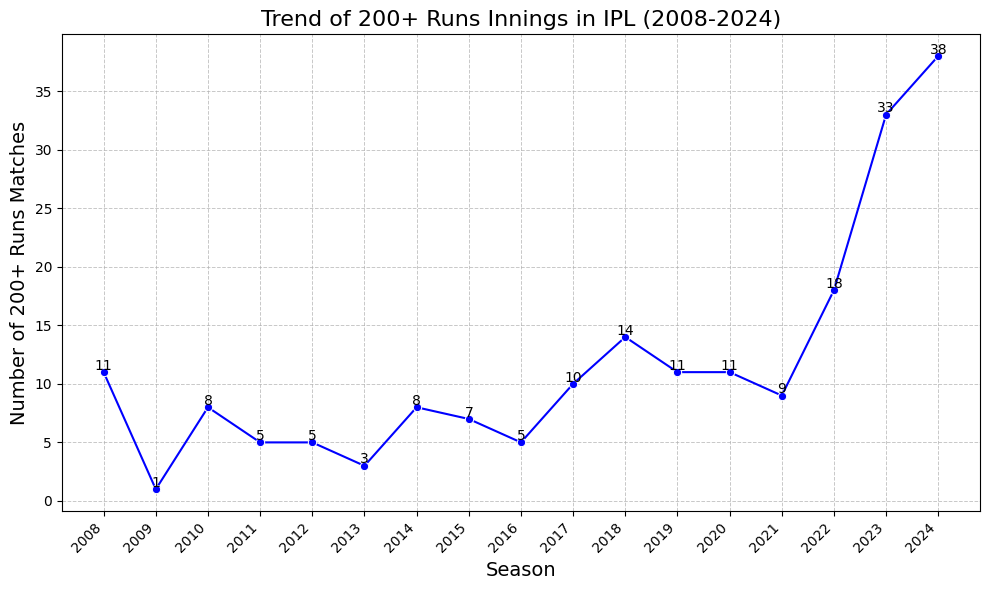

In [138]:
season_df= df_match[['id','season']]  #filtering data from match table for merging 

#merging filtered df and season df on the basis of match id
season_merged= pd.merge(season_df, filtered_df, left_on='id', right_on='match_id',how='inner')
season_merged_filtter= season_merged[season_merged['total_runs']>200]  # filtering only 200+ score row 

#Grouping with season to count the number of 200+ score 
seasonwise200= season_merged_filtter.groupby('season')['total_runs'].count()

# Sorting the seasons in ascending order for proper trend display
seasonwise200_sorted = seasonwise200.sort_index()

plt.figure(figsize=(10, 6))

# Ploting the trend using lineplot
sns.lineplot(x=seasonwise200_sorted.index, y=seasonwise200_sorted.values, marker='o', color='b')

# Adding values on top of the markers
for index, value in enumerate(seasonwise200_sorted.values):
    plt.text(index, value + 0.2, str(value), ha='center', fontsize=10)

plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Adding labels and title
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number of 200+ Runs Matches', fontsize=14)
plt.title('Trend of 200+ Runs Innings in IPL (2008-2024)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

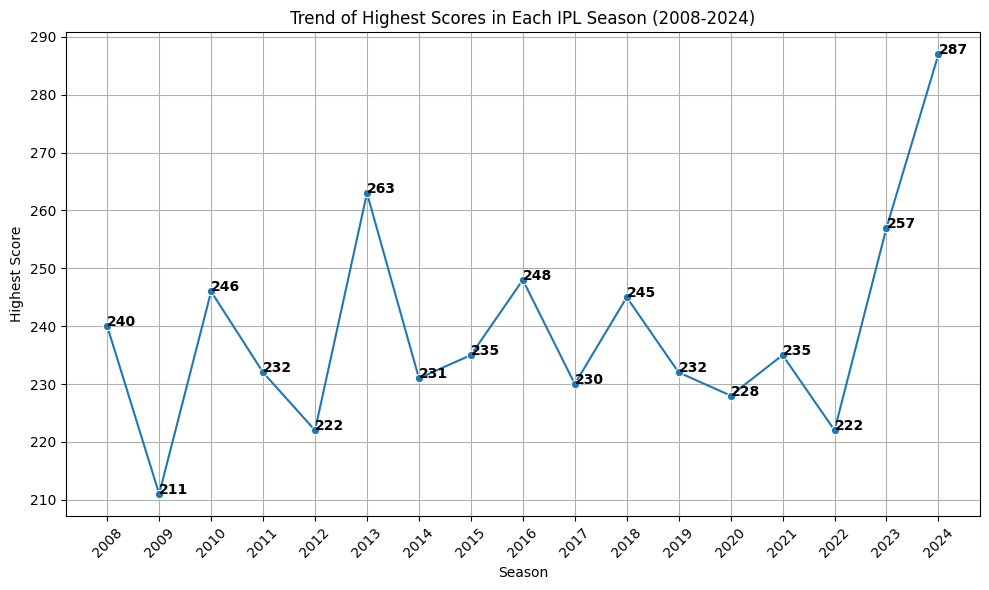

In [159]:
seasonwise_maxscore= season_merged_filtter[['season','total_runs']]
seasonwise_maxscore =seasonwise_maxscore.groupby('season')['total_runs'].max().reset_index()

# Plotting the trend of highest scores in each season
plt.figure(figsize=(10, 6))
sns.lineplot(data=seasonwise_maxscore, x='season', y='total_runs', marker='o')

# Showing values on the plot
for index, row in seasonwise_maxscore.iterrows():
    plt.text(row['season'], row['total_runs'], row['total_runs'], 
             horizontalalignment='left', size='medium', color='black', weight='semibold')

# Adding titles and labels
plt.title('Trend of Highest Scores in Each IPL Season (2008-2024)')
plt.xlabel('Season')
plt.ylabel('Highest Score')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [160]:
# Grouping by season and batting team to count 200+ run occurrences
team_season_trend = season_merged_filtter.groupby(['season', 'batting_team']).size().reset_index(name='200_plus_runs_count')

# Pivot the data to get teams as columns and seasons as rows
pivot_trend = team_season_trend.pivot(index='season', columns='batting_team', values='200_plus_runs_count').fillna(0)
pivot_trend.head(3)

batting_team,Chennai Super Kings,Delhi Capitals,Gujarat Titans,Kings XI Punjab,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Rajasthan Royals,Royal Challengers Bangalore,Sunrisers Hyderabad
season,,,,,,,,,,
2008,3.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0,0.0,1.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2010,1.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,1.0,0.0


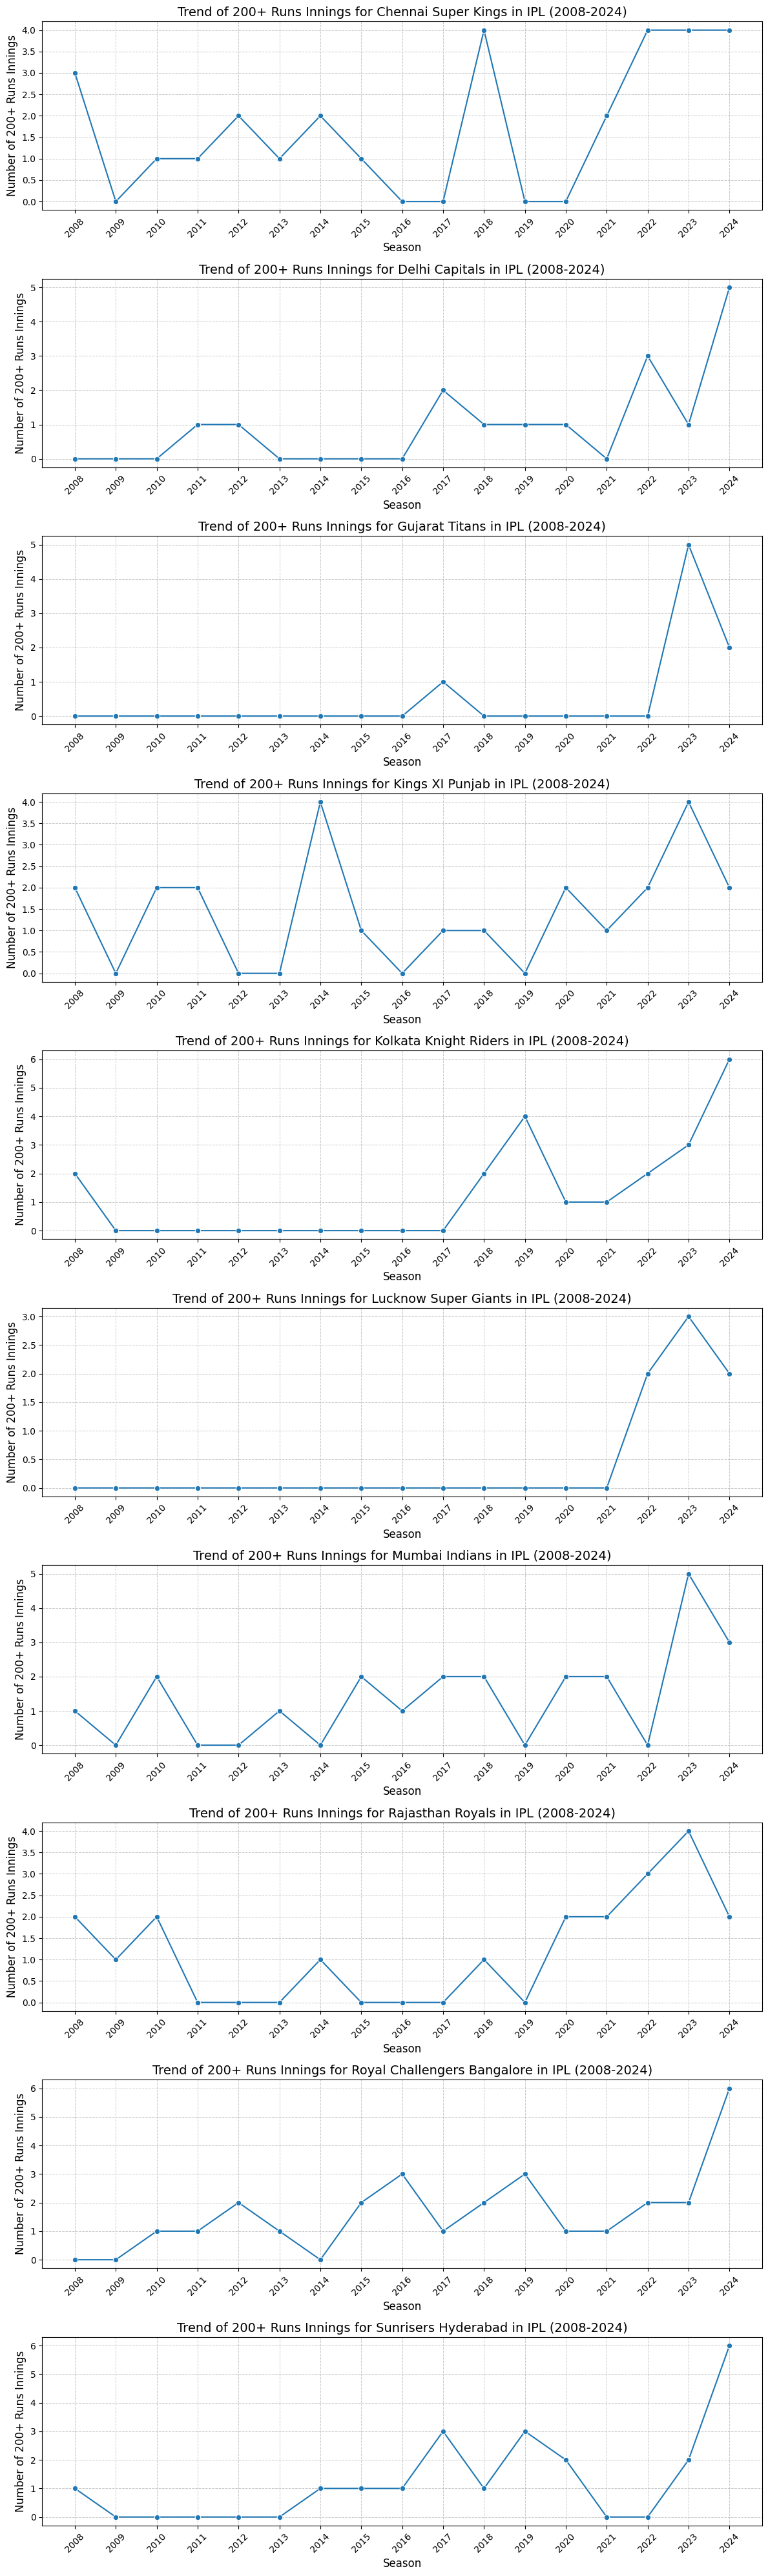

In [161]:
# taking the list of teams
teams = pivot_trend.columns

plt.figure(figsize=(12, len(teams) * 4)) 

# Looping through each team and plot their trend
for i, team in enumerate(teams):
    plt.subplot(len(teams), 1, i + 1)  # Create a subplot for each team
    sns.lineplot(data=pivot_trend[team], marker='o', dashes=False)
    
    # Add grid, labels, and title for each subplot
    plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
    plt.title(f'Trend of 200+ Runs Innings for {team} in IPL (2008-2024)', fontsize=14)
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Number of 200+ Runs Innings', fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [163]:
virat=df_del[df_del['batter']=='V Kohli']

In [165]:
print(virat['total_runs'].sum())

8307


In [169]:
def run_machine(vk,runs):
    return len(vk[vk['batsman_runs']==runs])*runs
print(f"virat_kohli scored {run_machine(virat,1)} by taking 1's ")
print(f"virat_kohli {run_machine(virat,2)} by taking 2's ")
print(f"virat_kohli {run_machine(virat,3)} by taking 3's ")
print(f"virat_kohli {run_machine(virat,4)} by hitting 4's ")
print(f"virat_kohli {run_machine(virat,6)} by hitting 6's ")

virat_kohli scored 2591 by taking 1's 
virat_kohli 890 by taking 2's 
virat_kohli 63 by taking 3's 
virat_kohli 2832 by hitting 4's 
virat_kohli 1638 by hitting 6's 
